# Notebook to look at recordings from steering muscles; ideally differentiate between b1 and b2

## Imports

In [1]:
import os 
import glob
import pickle
import pywt 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal

# from matplotlib import rcParams
from mosquito.process_abf import load_processed_data

## Params

In [2]:
plt.style.use('dark_background')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels

## Load data

In [22]:
# loading separate data for b1 and b2
data_folder_b1 = 46
axo_num_b1 = 5

data_folder_b2 = 46
axo_num_b2 = 6

In [23]:
# get data files
data_b1 = load_processed_data(data_folder_b1, axo_num_b1, data_suffix='_spikes')
data_b2 = load_processed_data(data_folder_b2, axo_num_b2, data_suffix='_spikes')

data_list = [data_b1, data_b2]
data_labels = ['b1', 'b2']


In [24]:
for key in data_b1.keys():
    print(key)

sampling_freq
filepath
units
header
time
emg
cam
mic
odor
species
muscle_type
filename
mic_filt
mic_phase
wbf_mean
wbf
flying_idx
emg_filt
spikes
spike_t
spike_idx
spike_rate
params
good_spike_idx
good_spikes
mic_phase_at_spike


## First just visually check spike detection


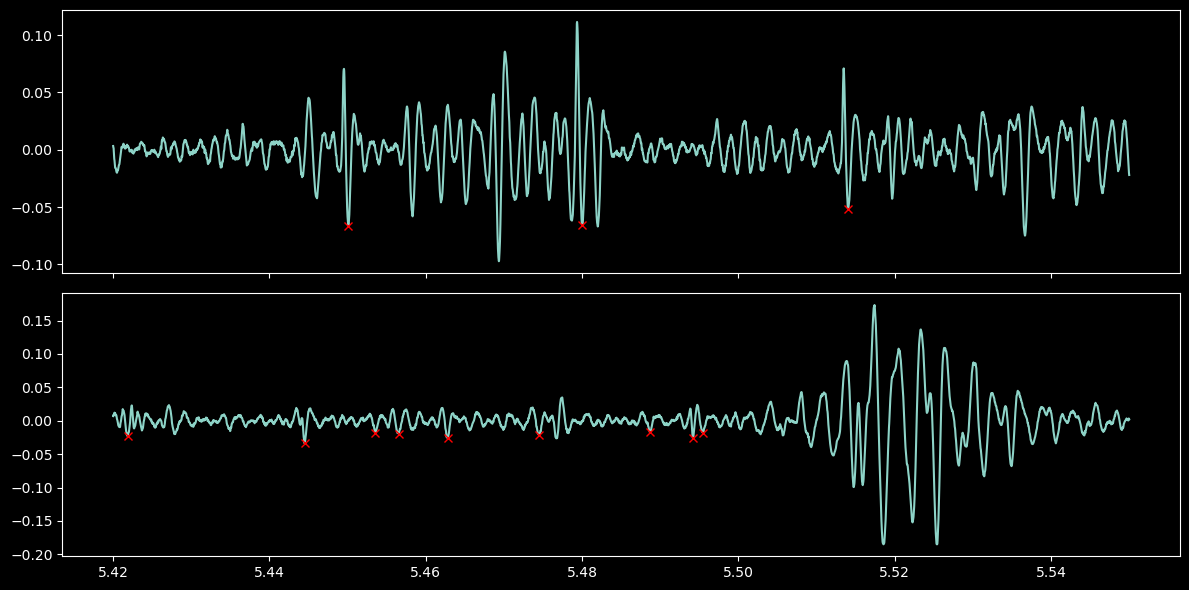

In [33]:
# plot emg and spike detection
fig, ax_list = plt.subplots(2,1,figsize=(12,6),sharex=True)
ax_list.ravel()

tmin = 5.42
tmax = 5.55

for ith, data in enumerate(data_list):
    t = data['time']
    emg_filt = data['emg_filt']
    good_spike_idx = data['good_spike_idx']

    mask = (t >= tmin) & (t <= tmax)
    mask_spikes = (t[good_spike_idx] >= tmin) & (t[good_spike_idx] <= tmax)
    
    ax_list[ith].plot(t[mask], emg_filt[mask]) 
    ax_list[ith].plot(t[good_spike_idx][mask_spikes], emg_filt[good_spike_idx][mask_spikes], 'rx')

fig.tight_layout()